# Best Places to Live for National Park Lovers

## Introduction

The aim of this project is to identify the best cities for individuals who love visiting U.S. national parks frequently. To accomplish this, we will assess the proximity between major U.S. cities and national parks, considering factors such as population density, geographic location, and ease of access to nature. The analysis focuses on the following key assumptions:

- The primary interest is in cities that are located near national parks, balancing both urban amenities and natural attractions.
- A preference for relatively densely populated Metropolitan Statistical Areas (MSAs) to ensure urban resources and opportunities are available.
- The goal is to find cities that are well-positioned for frequent visits to national parks, minimizing long travel distances.

By analyzing the distances between top U.S. MSAs and national parks, we can make data-driven recommendations on optimal places to live for park enthusiasts.

## Project Data

This project utilizes two main datasets:

1. **National Park Data**: A list of 63 U.S. National Parks.
2. **MSA Data**: Information on the top 100 Metropolitan Statistical Areas (MSAs) in the United States by population.

Both datasets were compiled and cleaned with the help of ChatGPT and are stored in CSV format.

### National Park Data

The National Park dataset contains the following columns for each park:

- **Park Name**: The official name of the national park.
- **Latitude**: Latitude coordinate of the park's central location.
- **Longitude**: Longitude coordinate of the park's central location.

This data is useful for calculating the geographic distance from MSAs to each national park.

### MSA Data

The MSA dataset includes the following details for the 100 largest metropolitan statistical areas in the U.S. based on population:

- **Rank**: The population rank of the MSA.
- **MSA Name**: The name of the MSA (e.g., "Los Angeles-Long Beach-Anaheim, CA").
- **States**: The state(s) that the MSA spans.
- **Population**: The population of the MSA.
- **Latitude**: Latitude coordinate of the MSA’s geographic center.
- **Longitude**: Longitude coordinate of the MSA’s geographic center.

This dataset helps us identify the largest cities that will be analyzed for their proximity to national parks.

### Initial Data Processing and Visualization

We'll start by reading in both datasets and performing initial data cleaning. Afterward, we will visualize the locations of all MSAs and national parks to get an initial sense of their distribution across the U.S.

In [3]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [4]:
# Read in MSA data
msa_csv = "./data/msa_ranked.csv"
msa_df = pd.read_csv(msa_csv, index_col='Rank')

# Read in the National Park data
csv_file = "./data/national_parks.csv"
parks_df = pd.read_csv(csv_file)


# Create a folium map centered at an approximate midpoint of all MSAs
map_center = [msa_df['Latitude'].mean(), msa_df['Longitude'].mean()]
msa_map = folium.Map(location=map_center, zoom_start=4)

# Add each MSA to the map
for _, row in msa_df.iterrows():
    msa_name = row['MSA']
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    folium.Marker(
        location=[latitude, longitude],
        tooltip=folium.Tooltip(msa_name),
        icon=folium.Icon(color='gray', icon="city", prefix="fa")
    ).add_to(msa_map)

# Add each national park to the map
for _, row in parks_df.iterrows():
    park_name = row['Name']
    latitude = row['Latitude']
    longitude = row['Longitude']

    pin_color = 'green'
    
    folium.Marker(
        location=[latitude, longitude],
        tooltip=folium.Tooltip(park_name),
        icon=folium.Icon(color=pin_color, icon="tree", prefix="fa")
    ).add_to(msa_map)


msa_map

### Calculating Proximity of National Parks to MSAs

To better understand the accessibility of national parks from each MSA, we will calculate how many parks fall within specific distance ranges (100, 200, and 300 miles) of each city. These distances are chosen to represent practical travel ranges for individuals who want to visit national parks frequently.

- **100 miles**: This is considered a short trip for a day trip or a weekend getaway. It’s a reasonable distance for a person to drive without much preparation, making it ideal for people looking for nearby parks to visit regularly.
  
- **200 miles**: This range represents a slightly longer trip, which could be more typical for people planning a weekend or extended getaway. It’s still within a manageable driving distance for most individuals, but may require more planning than a quick day trip.

- **300 miles**: This distance accounts for those willing to travel farther for access to a larger variety of parks or for longer trips. It's more suitable for people who might not visit the parks as frequently but are still interested in traveling to a greater number of parks over time.

By calculating the number of national parks within each of these distance ranges, we can get a clearer, data-driven sense of how easily each MSA provides access to parks at varying levels of travel commitment. We will use the `geodesic` method from the `geopy` library to compute these distances:

In [5]:
distances = [100, 200, 300]

for distance in distances:
    distance_name = f'Within {distance} Miles'
    msa_df[distance_name] = 0

    for idx, msa in msa_df.iterrows():
        msa_coords = (msa['Latitude'], msa['Longitude'])
        for _, park in parks_df.iterrows():
            park_coords = (park['Latitude'], park['Longitude'])
            distance_diff = float(geodesic(msa_coords, park_coords).miles)
            if distance_diff <= distance:
                msa_df.at[idx, distance_name] += 1

Right now, we're only really interested in the cities that have parks within 100 miles:

In [6]:
# Remove lat/long for readability
ideal_msa_df = msa_df.drop(['Latitude', 'Longitude'], axis=1)
# Only get places that are within 100 miles of at least one park
ideal_msa_df = ideal_msa_df[ideal_msa_df['Within 100 Miles'] > 0]

print(f'{len(ideal_msa_df)} MSAs have at least one park within 100 miles.')
ideal_msa_df.sort_values(by='Within 100 Miles', ascending=False)

32 MSAs have at least one park within 100 miles.


,MSA,States,Population,Within 100 Miles,Within 200 Miles,Within 300 Miles
Rank,,,,,,
66,Fresno,CA,1054032,4,6,8
15,Seattle-Tacoma-Bellevue,WA,4018762,3,3,3
54,El Paso,TX,868859,2,3,6
95,Visalia,CA,488000,2,6,7
72,Modesto,CA,563490,2,5,8
98,Bakersfield,CA,905801,2,6,7
8,Miami-Fort Lauderdale-West Palm Beach,FL,6138333,2,3,3
19,Denver-Aurora-Lakewood,CO,2963821,1,3,7
21,St. Louis,MO,2820253,1,1,3


I'm curious how these cities are distributed by state:

States
 CA    8
 SC    4
 CO    3
 TN    2
 VA    1
 NC    1
 GA    1
 AR    1
 TX    1
 AZ    1
 KY    1
 NV    1
 IL    1
 PA    1
 MO    1
 WA    1
 FL    1
VA     1
 WV    1
Name: count, dtype: int64
count    32.000000
mean      2.376126
std       2.883119
min       0.304214
25%       0.754304
50%       1.048733
75%       2.700310
max      13.200998
Name: Population, dtype: float64


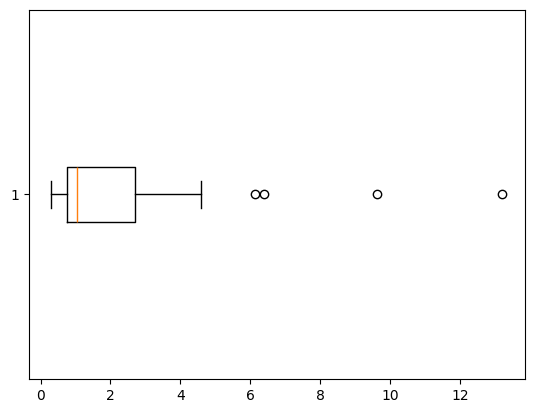

In [7]:
state_counts = ideal_msa_df['States'].value_counts()
print(state_counts)
print((ideal_msa_df['Population'] / 1000000).describe())
plt.boxplot(ideal_msa_df['Population'] / 1000000, vert=False)
plt.show()

Let's look at the furthest distance considered. How do things change when we consider the MSAs that have at least 4 parks within 300 miles?

In [8]:
# Remove lat/long for readability
ideal_msa_df = msa_df.drop(['Latitude', 'Longitude'], axis=1)
# Only get places that are within 300 miles of at least one park
ideal_msa_df = ideal_msa_df[ideal_msa_df['Within 300 Miles'] > 3]

print(f'{len(ideal_msa_df)} MSAs have at least four parks within 300 miles.')
ideal_msa_df.sort_values(by='Within 300 Miles', ascending=False)

39 MSAs have at least four parks within 300 miles.


,MSA,States,Population,Within 100 Miles,Within 200 Miles,Within 300 Miles
Rank,,,,,,
29,Las Vegas-Henderson-Paradise,NV,2265461,1,8,11
74,Provo-Orem,UT,668508,0,5,10
51,Albuquerque,NM,942000,0,4,10
100,Reno,NV,529312,0,2,9
63,Ogden-Clearfield,UT,709000,0,2,9
34,San Jose-Sunnyvale-Santa Clara,CA,1995911,1,4,8
76,Stockton,CA,746536,1,5,8
72,Modesto,CA,563490,2,5,8
66,Fresno,CA,1054032,4,6,8


States
CA    13
NC     4
CO     3
OH     3
AZ     2
SC     2
NV     2
UT     2
OR     1
IN     1
KY     1
NM     1
TX     1
TN     1
WA     1
WV     1
Name: count, dtype: int64
count    39.000000
mean      1.818964
std       2.240203
min       0.304214
25%       0.673462
50%       0.928195
75%       2.261172
max      13.200998
Name: Population, dtype: float64


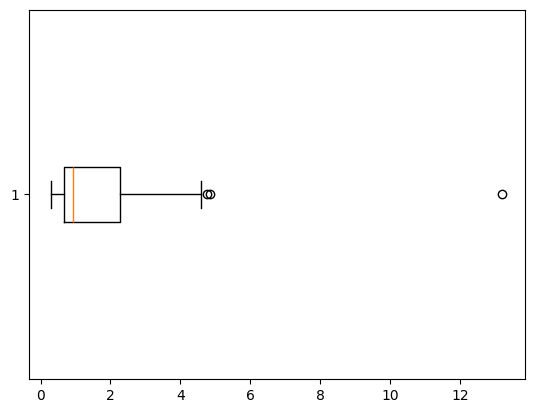

In [9]:
state_counts = ideal_msa_df['States'].value_counts()
print(state_counts)
print((ideal_msa_df['Population'] / 1000000).describe())
plt.boxplot(ideal_msa_df['Population'] / 1000000, vert=False)
plt.show()

We see a lot of the same MSAs from the 100-mile distance analysis, but there are some additional ones. In an ideal case, the city would be close enough to at least one or two parks to take a day trip, but also close enough to many more parks to take a weekend trip. Let's consider only the MSAs that are within 100 miles of at least one national park and within 300 miles of at least 4 national parks:

In [10]:
# Remove lat/long for readability
ideal_msa_df = msa_df.drop(['Latitude', 'Longitude'], axis=1)

ideal_msa_df = ideal_msa_df[
    (ideal_msa_df['Within 100 Miles'] > 0) & 
    (ideal_msa_df['Within 300 Miles'] > 3)
]

print(f'{len(ideal_msa_df)} MSAs have at least one park within 100 Miles and at least 4 parks within 300 Miles.')
ideal_msa_df.sort_values(by='Within 300 Miles', ascending=False)

20 MSAs have at least one park within 100 Miles and at least 4 parks within 300 Miles.


,MSA,States,Population,Within 100 Miles,Within 200 Miles,Within 300 Miles
Rank,,,,,,
29,Las Vegas-Henderson-Paradise,NV,2265461,1,8,11
76,Stockton,CA,746536,1,5,8
34,San Jose-Sunnyvale-Santa Clara,CA,1995911,1,4,8
72,Modesto,CA,563490,2,5,8
66,Fresno,CA,1054032,4,6,8
2,Los Angeles-Long Beach-Anaheim,CA,13200998,1,5,7
13,Riverside-San Bernardino-Ontario,CA,4599839,1,4,7
95,Visalia,CA,488000,2,6,7
75,Fort Collins,CO,359400,1,3,7


States
CA    8
CO    3
SC    2
NV    1
KY    1
AZ    1
TX    1
TN    1
NC    1
WV    1
Name: count, dtype: int64
count    20.000000
mean      1.918929
std       2.865836
min       0.304214
25%       0.700774
50%       0.916998
75%       2.063299
max      13.200998
Name: Population, dtype: float64


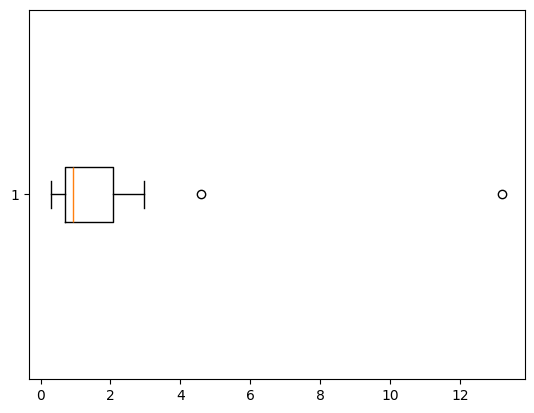

In [11]:
state_counts = ideal_msa_df['States'].value_counts()
print(state_counts)
print((ideal_msa_df['Population'] / 1000000).describe())
plt.boxplot(ideal_msa_df['Population'] / 1000000, vert=False)
plt.show()

### Combining Distance-Based Metrics for Better Clarity

To determine which MSAs are most ideal for national park lovers, we can combine the counts of national parks that fall within 100, 200, and 300 miles of each MSA. This will create a single aggregate metric that reflects a more holistic measure of park accessibility at varying proximities for each metro area.

This metric will help us rank the MSAs by their overall proximity to national parks, making it easier to identify which cities are most conveniently located for frequent park visits.

In [12]:
ideal_msa_df['combined'] = sum([
    ideal_msa_df['Within 100 Miles'],
    ideal_msa_df['Within 200 Miles'],
    ideal_msa_df['Within 300 Miles']
])

ideal_msa_df.sort_values(by='combined', ascending=False)

,MSA,States,Population,Within 100 Miles,Within 200 Miles,Within 300 Miles,combined
Rank,,,,,,,
29,Las Vegas-Henderson-Paradise,NV,2265461,1,8,11,20
66,Fresno,CA,1054032,4,6,8,18
98,Bakersfield,CA,905801,2,6,7,15
95,Visalia,CA,488000,2,6,7,15
72,Modesto,CA,563490,2,5,8,15
76,Stockton,CA,746536,1,5,8,14
2,Los Angeles-Long Beach-Anaheim,CA,13200998,1,5,7,13
34,San Jose-Sunnyvale-Santa Clara,CA,1995911,1,4,8,13
13,Riverside-San Bernardino-Ontario,CA,4599839,1,4,7,12


In [13]:
ideal_msa_df = msa_df[msa_df['MSA'].isin(ideal_msa_df['MSA'])]

# Create a folium map centered at an approximate midpoint of all MSAs
map_center = [ideal_msa_df['Latitude'].mean(), ideal_msa_df['Longitude'].mean()]
ideal_msa_map = folium.Map(location=map_center, zoom_start=4)

# Add each MSA to the map
for _, row in ideal_msa_df.iterrows():
    msa_name = row['MSA']
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    folium.Marker(
        location=[latitude, longitude],
        tooltip=folium.Tooltip(msa_name),
        icon=folium.Icon(color='gray', icon="city", prefix="fa")
    ).add_to(ideal_msa_map)

# Add each national park to the map
for _, row in parks_df.iterrows():
    park_name = row['Name']
    latitude = row['Latitude']
    longitude = row['Longitude']

    pin_color = 'green'
    
    folium.Marker(
        location=[latitude, longitude],
        tooltip=folium.Tooltip(park_name),
        icon=folium.Icon(color=pin_color, icon="tree", prefix="fa")
    ).add_to(ideal_msa_map)


ideal_msa_map

### Initial Conclusions

This project highlighted a few key metro areas that have a high degree of proximity to multiple national parks:

**Best All-Around MSA: Fresno, CA**:
Fresno emerges as the standout metro area for accessibility to national parks. Located in California's Central Valley, Fresno is within 300 miles of 8 national parks, and 4 of these are within a 100-mile radius, including Yosemite, Sequoia, and Kings Canyon National Parks. This exceptional park proximity, combined with Fresno Yosemite International Airport (FAT), makes Fresno an ideal gateway for those who wish to explore the natural beauty of the United States. Fresno’s central location positions it as a hub for outdoor recreation and nature tourism, offering unparalleled access to some of the nation's most iconic landscapes.

**Best Very Large MSA: Los Angeles-Long Beach-Anaheim, CA**:
As the second most populous metropolitan area in the United States, Los Angeles offers a surprising level of access to national parks. While only one national park (Channel Islands) is within 100 miles, Los Angeles sits within 300 miles of 6 additional national parks, including Joshua Tree, Sequoia, and Death Valley. Los Angeles International Airport (LAX), one of the busiest airports in the world, is also conveniently located nearby. The variety of ecosystems accessible from Los Angeles, ranging from desert landscapes to alpine forests, is simply unmatched, making it a top home base choice for nature lovers who value diversity and urban convenience.

**Best East Coast MSA: Charlotte-Concord-Gastonia, NC-SC**:
Charlotte stands out as one of the top East Coast metro areas for access to national parks and natural attractions. Within 300 miles, residents and visitors can explore the Great Smoky Mountains National Park, the Blue Ridge Parkway, and Congaree National Park's unique swamp ecosystems. Additionally, weekend trips are feasible to Shenandoah National Park and New River Gorge National Park and Preserve, providing a wide range of landscapes, from rugged mountain terrain to lush forests and wetlands. Charlotte’s position as a transportation hub, with the Charlotte Douglas International Airport (CLT), enhances its accessibility for travelers. This blend of urban amenities, rich biodiversity, and proximity to iconic national parks makes Charlotte an ideal base for nature enthusiasts in the southeastern United States.